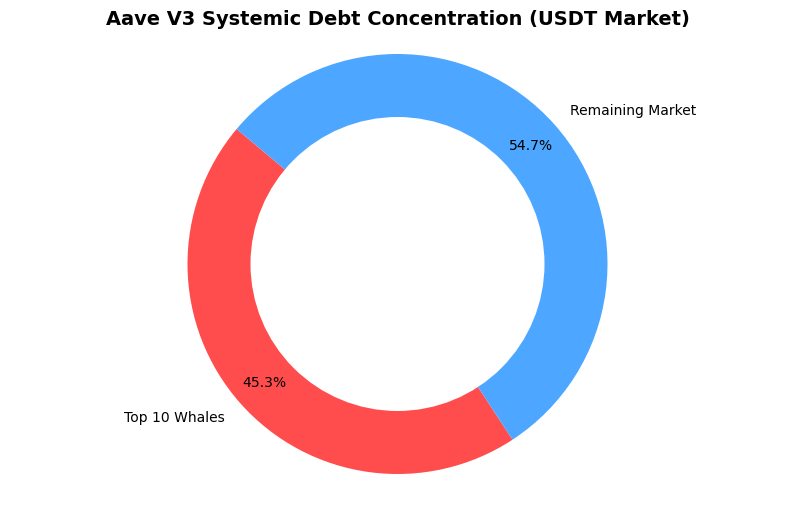

C:\Users\kelvi\AppData\Local\Temp\ipykernel_24236\2867104943.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_collateral_volume', y='representative_token', data=df_collateral_plot, palette='viridis')


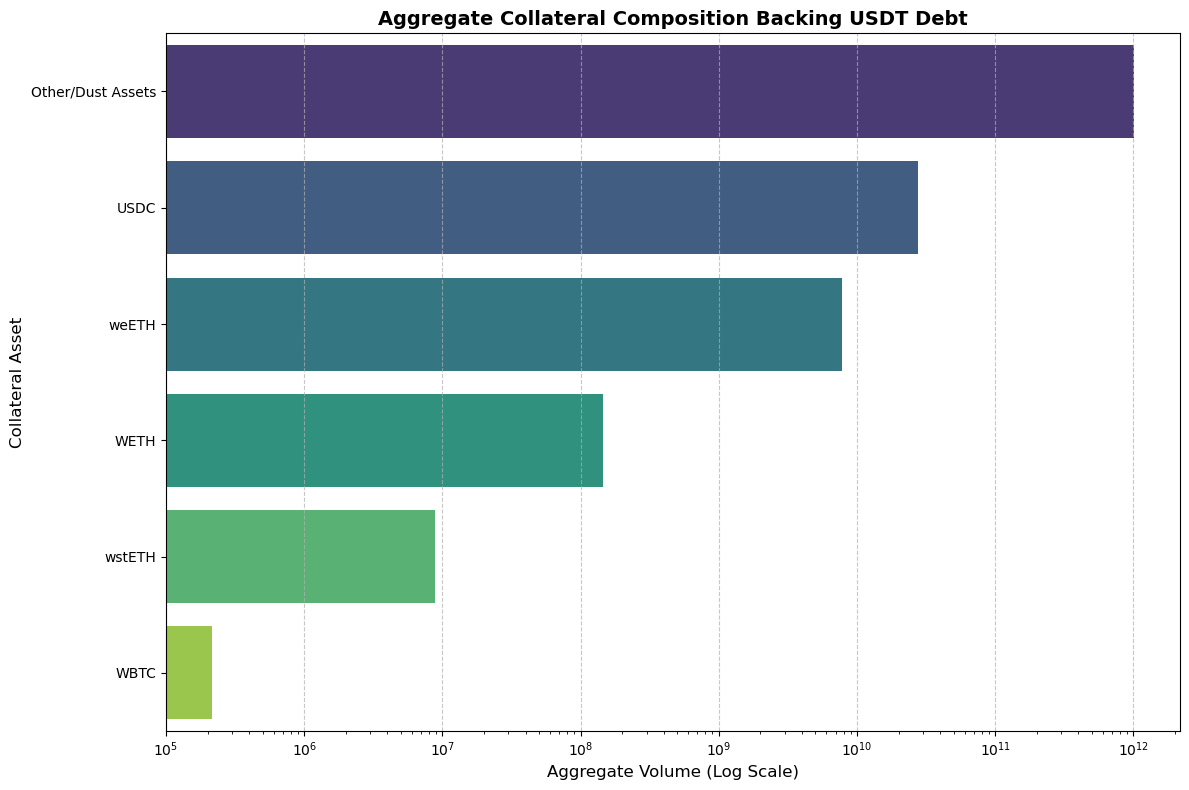

--- Systemic Risk Summary ---
Pareto Ratio: 45.33% of total debt is held by Top 10 users.
Risk Characterization: Distributed Risk
Dominant Collateral: Other/Dust Assets


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
# df_concentration: Contains the Pareto analysis of top debtors vs total market
# df_collateral: Contains the breakdown of collateral tokens backing the debt
df_concentration = pd.read_csv('07_systemic_concentration_audit.csv')
df_collateral = pd.read_csv('08_aggregate_collateral_composition.csv')

# --- 2. Systemic Debt Concentration (Pareto Analysis) ---
# We compare the Top 10 Debtors' exposure against the rest of the protocol
total_debt = df_concentration['total_protocol_usdt_debt'].iloc[0]
top_10_debt = df_concentration['top_10_total_debt'].iloc[0]
others_debt = total_debt - top_10_debt

# Data setup for the Donut Chart
labels = ['Top 10 Whales', 'Remaining Market']
sizes = [top_10_debt, others_debt]
colors = ['#ff4d4d', '#4da6ff'] # Red for risk concentration, Blue for stability

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)

# Create the donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Aave V3 Systemic Debt Concentration (USDT Market)', fontsize=14, fontweight='bold')
plt.axis('equal')  
plt.savefig('debt_concentration_pareto.png')
plt.show()

# --- 3. Collateral Composition Audit ---
# Aggregate collateral by token type to identify dominant assets
df_collateral_agg = df_collateral.groupby('representative_token')['aggregate_collateral_volume'].sum().reset_index()
df_collateral_agg = df_collateral_agg.sort_values(by='aggregate_collateral_volume', ascending=False)

# Group smaller assets into "Other" if necessary for better visualization
top_n = 6
if len(df_collateral_agg) > top_n:
    top_assets = df_collateral_agg.head(top_n)
    others_volume = df_collateral_agg.iloc[top_n:]['aggregate_collateral_volume'].sum()
    others_row = pd.DataFrame({'representative_token': ['Other Small Assets'], 'aggregate_collateral_volume': [others_volume]})
    df_collateral_plot = pd.concat([top_assets, others_row])
else:
    df_collateral_plot = df_collateral_agg

# Visualizing the Collateral Mix
plt.figure(figsize=(12, 8))
sns.barplot(x='aggregate_collateral_volume', y='representative_token', data=df_collateral_plot, palette='viridis')

# Add context: Log scale is often needed if one asset (like USDC) dwarfs others
plt.xscale('log') 
plt.title('Aggregate Collateral Composition Backing USDT Debt', fontsize=14, fontweight='bold')
plt.xlabel('Aggregate Volume (Log Scale)', fontsize=12)
plt.ylabel('Collateral Asset', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('collateral_composition_audit.png')
plt.show()

# --- 4. Actuarial Summary ---
# Display textual results for the audit report
pareto_ratio = df_concentration['pareto_ratio_percentage'].iloc[0]
risk_label = df_concentration['risk_characterization'].iloc[0]

print(f"--- Systemic Risk Summary ---")
print(f"Pareto Ratio: {pareto_ratio}% of total debt is held by Top 10 users.")
print(f"Risk Characterization: {risk_label}")
print(f"Dominant Collateral: {df_collateral_agg.iloc[0]['representative_token']}")